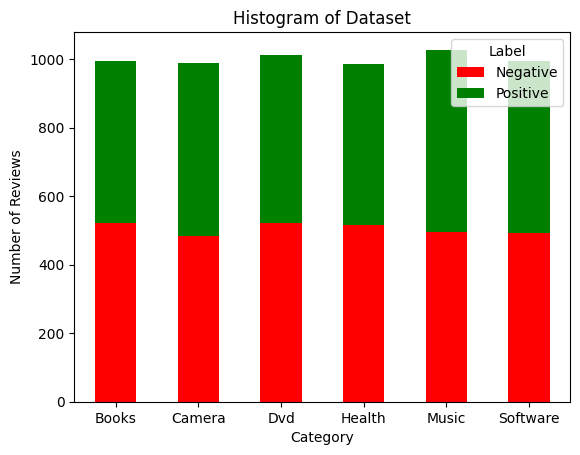

In [2]:
import re

import pandas as pd
import matplotlib.pyplot as plt

from lfd_assignment1 import read_corpus

data, categories = read_corpus('reviews.txt', False)
_, sentiments = read_corpus('reviews.txt', True)

df = pd.DataFrame({
    'category': [category.capitalize() for category in categories], 
    'label': ['Positive' if sentiment == 'pos' else 'Negative' for sentiment in sentiments]})

# Group by 'category' and 'label' and count occurrences
category_counts = df.groupby(['category', 'label']).size().unstack(fill_value=0)

category_counts.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Histogram of Dataset')
plt.xlabel('Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.legend(title='Label')
plt.savefig('images/histogram.png')
plt.show()


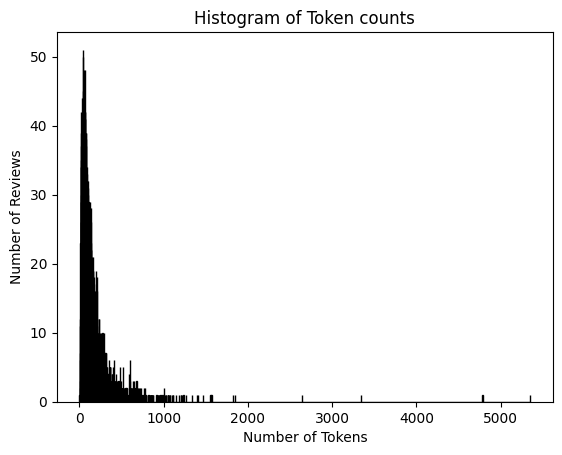

In [12]:
review_lengths = [len(review) for review in data]

plt.hist(review_lengths, bins=range(1, max(review_lengths)+2), edgecolor='black')
plt.title('Histogram of Token counts')
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Reviews')
plt.savefig('images/token_histogram.png')
plt.show()

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\matej\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matej\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\matej\AppData\Roaming\nltk_data...


True

In [3]:
# count distinct tokens

pattern = re.compile(r"^[a-zA-Z]+(?:'\w+)?$")

tokens = set([token for review in data for token in review if pattern.match(token)])

print(f'Number of distinct tokens: {len(tokens)}')

Number of distinct tokens: 31797


In [18]:
from collections import Counter

# filtering stopwords to see most common words, will not do this when fitting ML models
stopword_set = set(stopwords.words('english'))

tokens = [token for review in data for token in review if token.isalpha() and token not in stopword_set]

counter = Counter(tokens)
most_common = counter.most_common(10)
print(most_common)

[('one', 3333), ('like', 2615), ('book', 2301), ('would', 2288), ('good', 1961), ('get', 1802), ('camera', 1782), ('great', 1778), ('time', 1691), ('even', 1460)]


In [21]:
# Lemmatize the tokens first, see if there's a difference
lemmatizer = WordNetLemmatizer()

counter = Counter([lemmatizer.lemmatize(token) for token in tokens])
most_common = counter.most_common(10)
print(most_common)

[('one', 3482), ('like', 2681), ('book', 2650), ('would', 2288), ('time', 2171), ('get', 2014), ('good', 1973), ('camera', 1961), ('great', 1784), ('movie', 1731)]


In [20]:
from nltk.util import bigrams, trigrams

# Investigating bi- and trigrams
bigrams = [bigram for review in data for bigram in bigrams(review) if all(token.isalpha() for token in bigram) and all(token not in stopword_set for token in bigram)]

counter = Counter(bigrams)
most_common = counter.most_common(10)
print(most_common)

trigrams = [trigram for review in data for trigram in trigrams(review) if all(token.isalpha() for token in trigram) and all(token not in stopword_set for token in trigram)]

counter = Counter(trigrams)
most_common = counter.most_common(10)
print(most_common)

[(('much', 'better'), 166), (('even', 'though'), 124), (('years', 'ago'), 121), (('highly', 'recommend'), 117), (('first', 'time'), 105), (('customer', 'service'), 95), (('digital', 'camera'), 90), (('long', 'time'), 86), (('would', 'recommend'), 84), (('year', 'old'), 73)]
[(('would', 'highly', 'recommend'), 24), (('sucks', 'gnr', 'sucks'), 18), (('gnr', 'sucks', 'gnr'), 17), (('worth', 'every', 'penny'), 13), (('first', 'digital', 'camera'), 13), (('takes', 'great', 'pictures'), 12), (('new', 'york', 'city'), 11), (('palm', 'kernel', 'oil'), 10), (('world', 'war', 'ii'), 10), (('several', 'years', 'ago'), 9)]
